# Masked Face Detector
---
Masked and partially or fully unmasked face detector with application of:
* **pretrained PyTorch model** for face detection
* **Haar Cascade Classifiers** for eyes, mouths and noses detection
* **HOG Facial Landmarks** for jawline detection (lower border of face)
* **Human Skin Detector** (with **brightness & contrast minapulation**) for estimation of masked face percentage

**Final result** at the end.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from src.face_detector import inference
from src.human_silhouette_detector import detect_human_silhouettes, detect_human_silhouettes_and_faces
from src.haar_detector import detect_face_parts
from src.brightness_contrast import apply_brightness_contrast
from src.facial_landmarks_detector import detect_facial_landmarks, get_face_above_jaw
from src.human_skin_detector import detect_skin
from src.perc_calculation import calculate_masking_percentage, draw_roi

from src.example import example

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'MainModel.KitModel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by access

In [2]:
def show_images(images, titles, suptitle='Images'):
    assert (len(images) == len(titles)), 'Lists of images and titles of images must have the same length!'
    
    fig, ax = plt.subplots(1, len(images), figsize=(15, 5))
    
    for i, (image, title) in enumerate(zip(images, titles)):
        ax[i].imshow(image)
        ax[i].set_title(title)
        ax[i].axis('off')
    
    fig.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

## Silhouette and face detectors
---
PyTorch pretrained silhouette and face detection models.

In [3]:
image_unmasked = Image.open('images/unmasked_people1.jpg')
_, unmasked_faces_image = detect_human_silhouettes(image_unmasked)

image_masked = Image.open('images/masked_people2.jpg')
_, masked_faces_image = detect_human_silhouettes(image_masked)

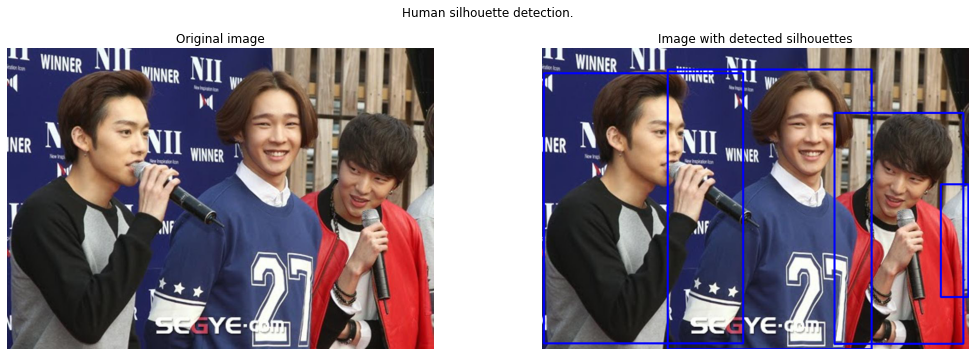

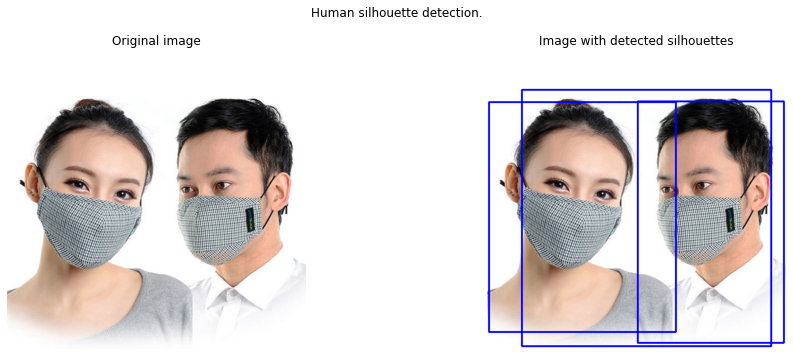

In [4]:
show_images([image_unmasked, unmasked_faces_image],
            ['Original image', 'Image with detected silhouettes'],
            suptitle='Human silhouette detection.')

show_images([image_masked, masked_faces_image],
            ['Original image', 'Image with detected silhouettes'],
            suptitle='Human silhouette detection.')

In [5]:
unmasked_faces_info, _, unmasked_faces_image = detect_human_silhouettes_and_faces(
    image_unmasked, highlight_neg=True)

masked_faces_info, _, masked_faces_image = detect_human_silhouettes_and_faces(
    image_masked, highlight_neg=True)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


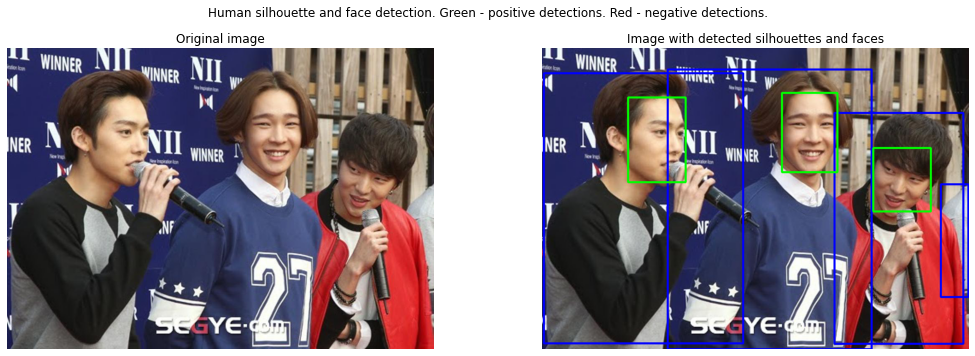

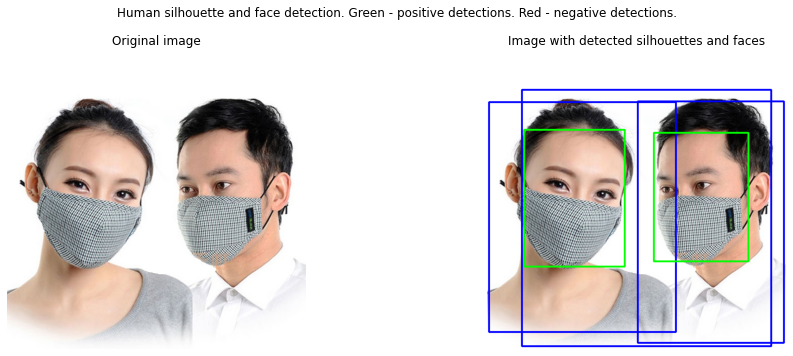

In [6]:
show_images([image_unmasked, unmasked_faces_image],
            ['Original image', 'Image with detected silhouettes and faces'],
            suptitle='Human silhouette and face detection. Green - positive detections. Red - negative detections.')

show_images([image_masked, masked_faces_image],
            ['Original image', 'Image with detected silhouettes and faces'],
            suptitle='Human silhouette and face detection. Green - positive detections. Red - negative detections.')

In [7]:
unmasked_faces_info, masked_faces_info

(array([[575, 107, 708, 297],
        [206, 118, 344, 321],
        [794, 239, 932, 391]]),
 array([[446, 221, 699, 565],
        [ 99, 213, 368, 579]]))

In [8]:
face_unmasked = image_unmasked.crop(tuple(unmasked_faces_info[0]))

face_masked = image_masked.crop(tuple(masked_faces_info[1]))

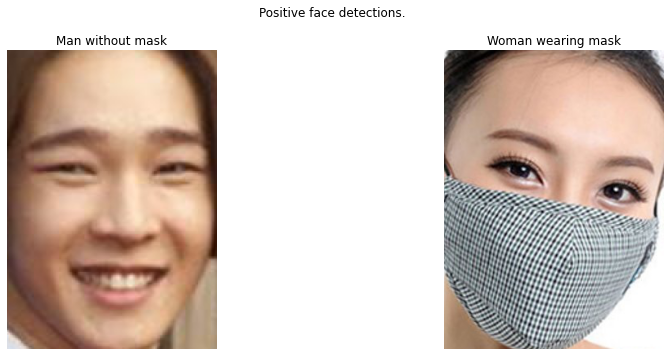

In [9]:
show_images([face_unmasked, face_masked], ['Man without mask', 'Woman wearing mask'],
            suptitle='Positive face detections.')

## Haar Cascade Classifiers

In [10]:
face_unmasked_parts_info, face_unmasked_parts = detect_face_parts(face_unmasked)

face_masked_parts_info, face_masked_parts = detect_face_parts(face_masked)

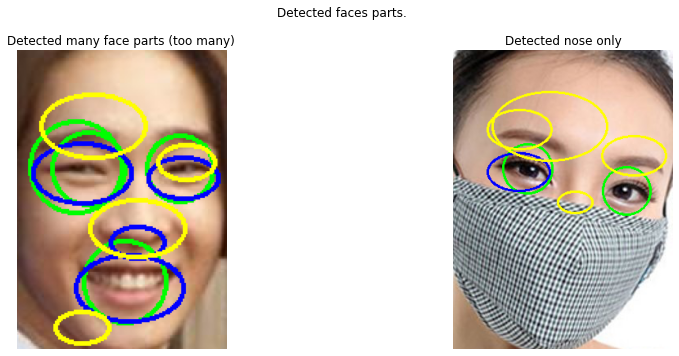

In [11]:
show_images([face_unmasked_parts, face_masked_parts], ['Detected many face parts (too many)', 'Detected nose only'], suptitle='Detected faces parts.')

In [12]:
face_unmasked_parts_info, face_masked_parts_info

({'eyes': [((42, 121), (94, 173)),
   ((82, 54), (125, 97)),
   ((22, 52), (68, 98)),
   ((8, 45), (67, 104))],
  'mouths': [((59, 112), (94, 133)),
   ((10, 59), (73, 97)),
   ((37, 130), (106, 172)),
   ((83, 68), (127, 94))],
  'noses': [((46, 95), (106, 131)),
   ((24, 166), (59, 187)),
   ((89, 60), (126, 82)),
   ((15, 28), (82, 68))]},
 {'eyes': [((61, 115), (122, 176)), ((183, 143), (241, 201))],
  'mouths': [((42, 126), (119, 172))],
  'noses': [((42, 73), (121, 121)),
   ((128, 173), (170, 199)),
   ((48, 51), (188, 135)),
   ((182, 105), (261, 153))]})

In [13]:
def extract_haar_cascade_features():
    # which values of detected regions are to pass on neural network
    pass

## HOG Facial Landmarks

In [14]:
face_unmasked_landmarks_info, face_unmasked_landmarks = detect_facial_landmarks(face_unmasked)

face_masked_landmarks_info, face_masked_landmarks = detect_facial_landmarks(face_masked)

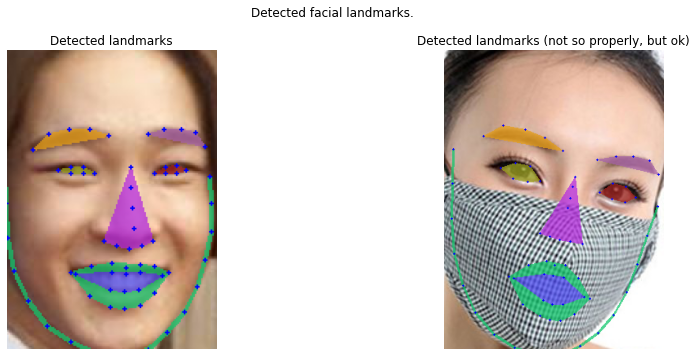

In [15]:
show_images([face_unmasked_landmarks, face_masked_landmarks],
            ['Detected landmarks', 'Detected landmarks (not so properly, but ok)'], suptitle='Detected facial landmarks.')

In [16]:
face_unmasked_landmarks_info['jaw'], face_masked_landmarks_info['jaw']

([(-2, 76),
  (-1, 97),
  (0, 119),
  (4, 140),
  (13, 159),
  (25, 175),
  (40, 185),
  (56, 192),
  (74, 193),
  (89, 190),
  (101, 179),
  (112, 166),
  (120, 150),
  (125, 133),
  (129, 115),
  (129, 97),
  (128, 80)],
 [(11, 121),
  (10, 163),
  (9, 206),
  (12, 249),
  (23, 288),
  (38, 321),
  (61, 348),
  (86, 364),
  (113, 372),
  (142, 373),
  (166, 362),
  (188, 346),
  (207, 324),
  (223, 296),
  (236, 262),
  (248, 227),
  (261, 191)])

In [17]:
face_unmasked_jp, face_unmasked_restr_roi, face_unmasked_restr_mask, face_unmasked_restr_face = get_face_above_jaw(
    face_unmasked, face_unmasked_landmarks_info['jaw'], draw_roi=True)

face_masked_jp, face_masked_restr_roi, face_masked_restr_mask, face_masked_restr_face = get_face_above_jaw(
    face_masked, face_masked_landmarks_info['jaw'], draw_roi=True)

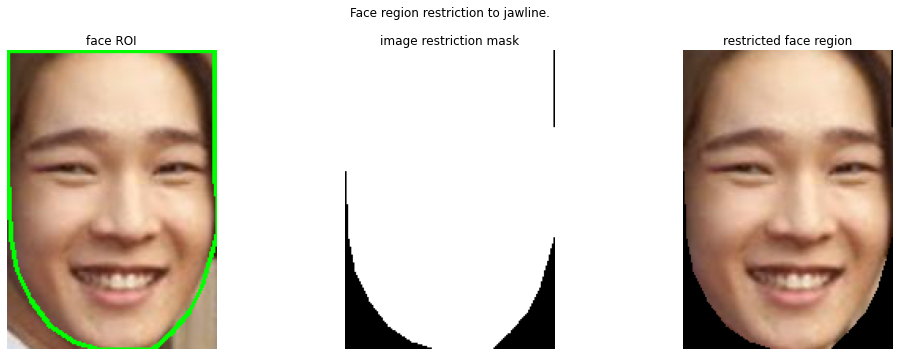

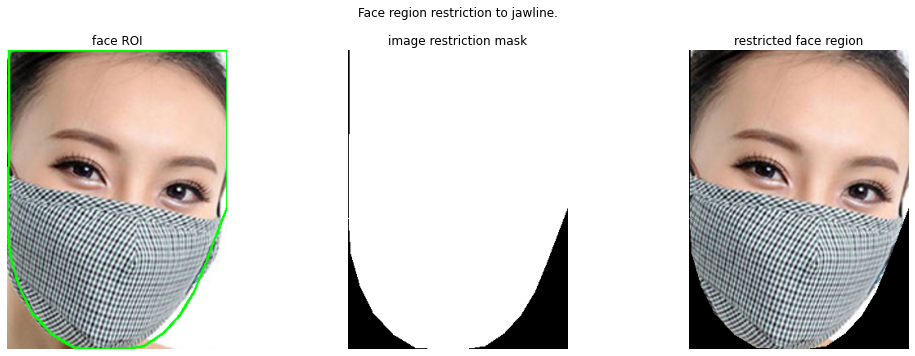

In [18]:
show_images([face_unmasked_restr_roi, face_unmasked_restr_mask, face_unmasked_restr_face],
            ['face ROI', 'image restriction mask', 'restricted face region'],
            suptitle='Face region restriction to jawline.')

show_images([face_masked_restr_roi, face_masked_restr_mask, face_masked_restr_face],
            ['face ROI', 'image restriction mask', 'restricted face region'],
            suptitle='Face region restriction to jawline.')

In [19]:
def extract_hog_landmarks_features():
    # which values of hog facial landmarks are to pass on neural network
    pass

## Brightness and Contrast manipulation
Reduce brightness and raise contrast.

In [20]:
BRIGHTNESS = 180
CONTRAST = 180

In [21]:
face_unmasked_bc = apply_brightness_contrast(face_unmasked, brightness=BRIGHTNESS, contrast=CONTRAST)
face_masked_bc = apply_brightness_contrast(face_masked, brightness=BRIGHTNESS, contrast=CONTRAST)

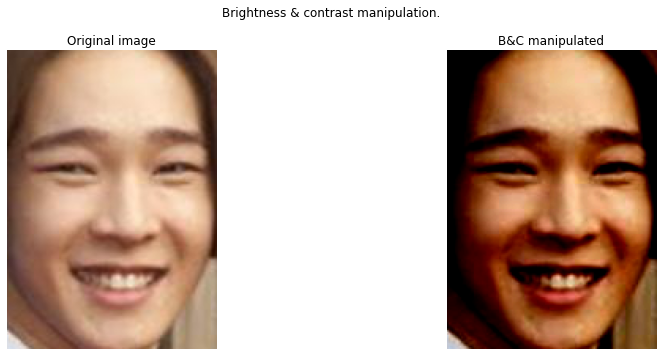

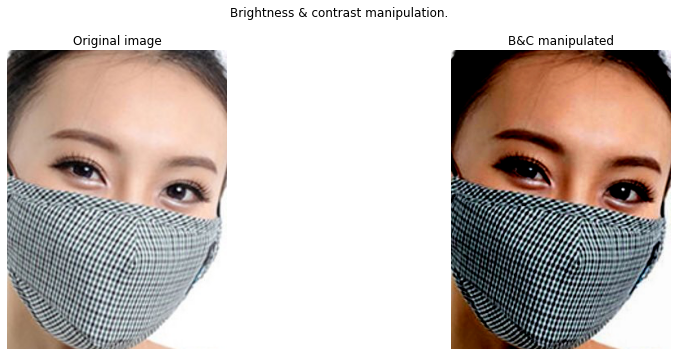

In [22]:
show_images([face_unmasked, face_unmasked_bc],
            ['Original image', 'B&C manipulated'],
            suptitle='Brightness & contrast manipulation.')

show_images([face_masked, face_masked_bc],
            ['Original image', 'B&C manipulated'],
            suptitle='Brightness & contrast manipulation.')

## Human Skin Detection

In [23]:
_, face_unmasked_skin_mask, face_unmasked_skin = detect_skin(face_unmasked, bc=face_unmasked_bc)

_, face_masked_skin_mask, face_masked_skin = detect_skin(face_masked, bc=face_masked_bc)

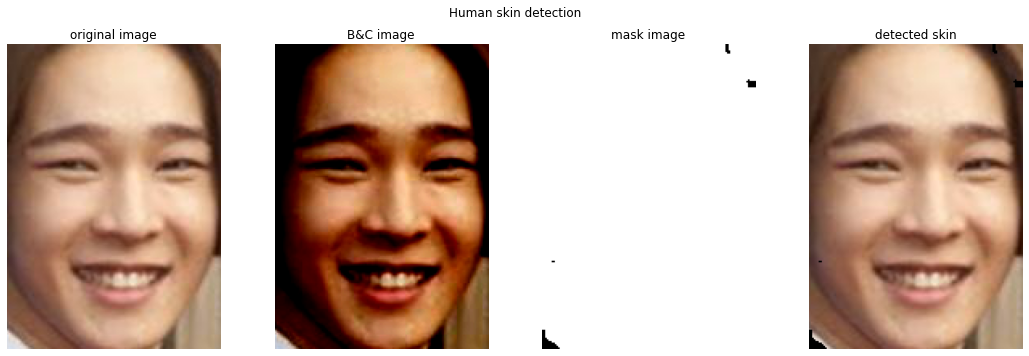

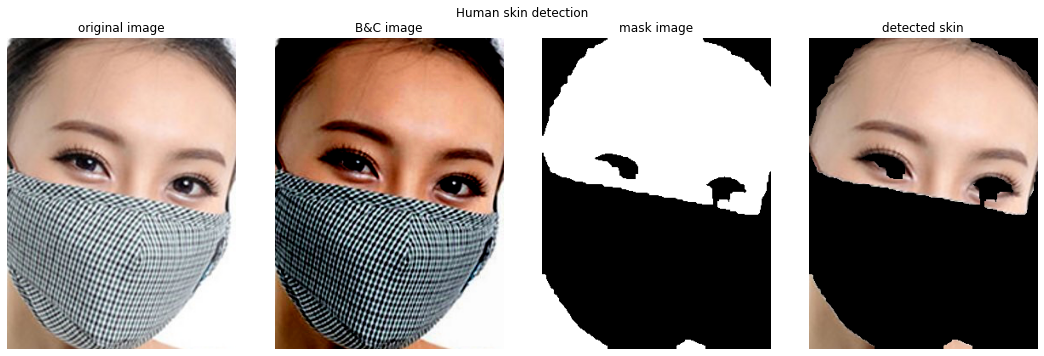

In [24]:
show_images([face_unmasked, face_unmasked_bc, face_unmasked_skin_mask, face_unmasked_skin],
            ['original image', 'B&C image', 'mask image', 'detected skin'], suptitle='Human skin detection')

show_images([face_masked, face_masked_bc, face_masked_skin_mask, face_masked_skin],
            ['original image', 'B&C image', 'mask image', 'detected skin'], suptitle='Human skin detection')

The masks for plain and B&C-manipulated images should be bitwise-or combined.

## Percentage of face masking calculation
---
In order to calculate the percentage of face masking it is necessary to:
1. Take the Haar Cascade detected face parts (true and false detections), which rectangles contain at least 80% of skin detected by Human Skin Detector.
2. Make areas marked by above regions white.
3. Perform bitwise "and" operation on masks for restricted face and detected skin.

Finish.

In [25]:
PERC_THR = 0.5

In [26]:
face_unmasked_perc, face_unmasked_final_mask, face_unmasked_final = calculate_masking_percentage(
    face_unmasked, face_unmasked_skin_mask, face_unmasked_restr_mask, face_unmasked_parts_info,
    perc_thr=PERC_THR)

face_masked_perc, face_masked_final_mask, face_masked_final = calculate_masking_percentage(
    face_masked, face_masked_skin_mask, face_masked_restr_mask, face_masked_parts_info,
    perc_thr=PERC_THR)

In [27]:
face_unmasked_perc, face_masked_perc

(0.0014399162230560592, 0.4914547918066199)

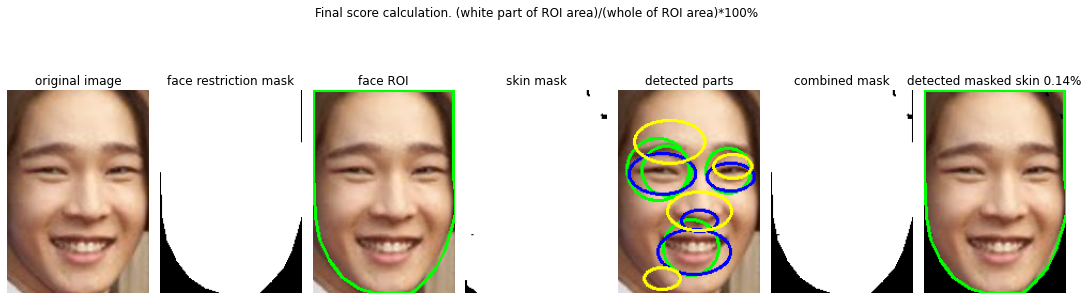

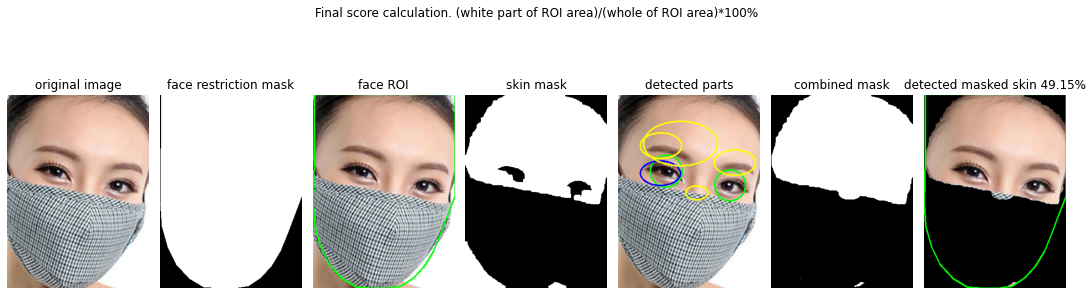

In [28]:
show_images([face_unmasked, face_unmasked_restr_mask, face_unmasked_restr_roi, face_unmasked_skin_mask,
             face_unmasked_parts,
             face_unmasked_final_mask,
             draw_roi(face_unmasked_final, face_unmasked_jp)],
            ['original image', 'face restriction mask', 'face ROI', 'skin mask', 'detected parts',
             'combined mask', f'detected masked skin {str(np.round(face_unmasked_perc*100, 2))}%'],
            suptitle='Final score calculation. (white part of ROI area)/(whole of ROI area)*100%')

show_images([face_masked, face_masked_restr_mask, face_masked_restr_roi, face_masked_skin_mask,
             face_masked_parts,
             face_masked_final_mask,
             draw_roi(face_masked_final, face_masked_jp)],
            ['original image', 'face restriction mask', 'face ROI', 'skin mask', 'detected parts',
             'combined mask', f'detected masked skin {str(np.round(face_masked_perc*100, 2))}%'],
            suptitle='Final score calculation. (white part of ROI area)/(whole of ROI area)*100%')

In [29]:
def extract_percentage_features():
    # pass masked and unmasked percentage on neural network
    pass

## Final result
---
Detected faces with annotation of masking percentage.

In [30]:
_, _, _, final_unmasked = example(image_unmasked, highlight_masking=True)
_, _, _, final_masked = example(image_masked, highlight_masking=True)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


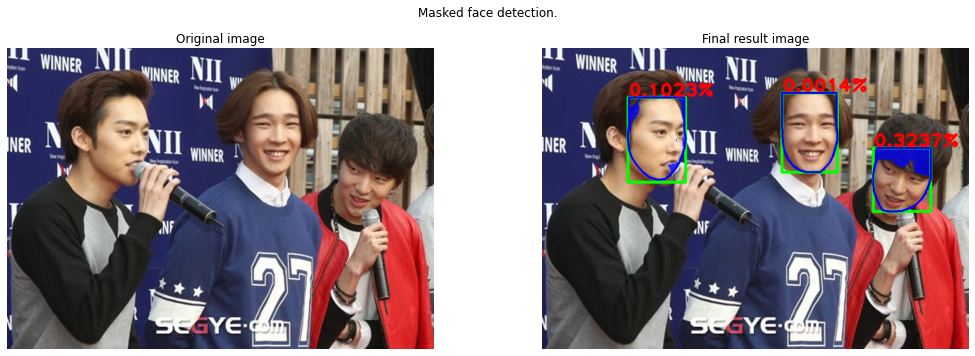

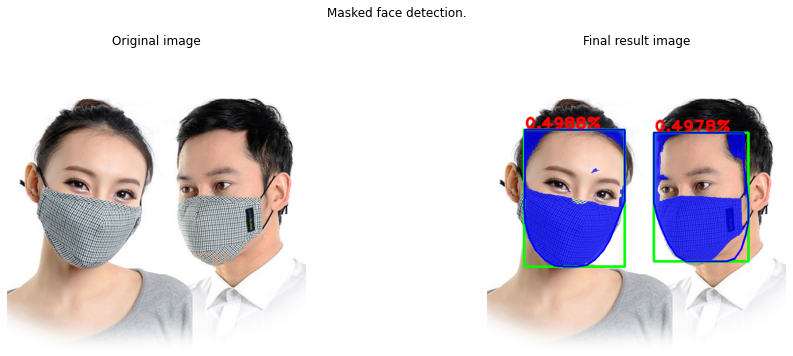

In [31]:
show_images([image_unmasked, final_unmasked],
            ['Original image', 'Final result image'],
            suptitle='Masked face detection.')

show_images([image_masked, final_masked],
            ['Original image', 'Final result image'],
            suptitle='Masked face detection.')

## Examples

In [32]:
img1 = Image.open('silh_images/51_Dresses_wearingdress_51_313.jpg')
_, _, _, final_img1 = example(img1, highlight_masking=True)

img2 = Image.open('silh_images/52_Photographers_photographertakingphoto_52_316.jpg')
_, _, _, final_img2 = example(img2, highlight_masking=True)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


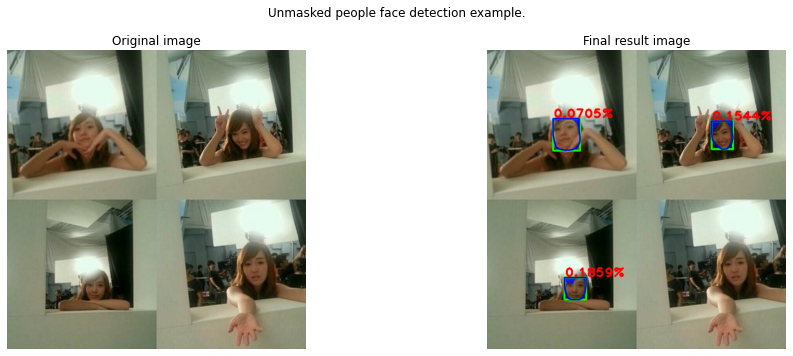

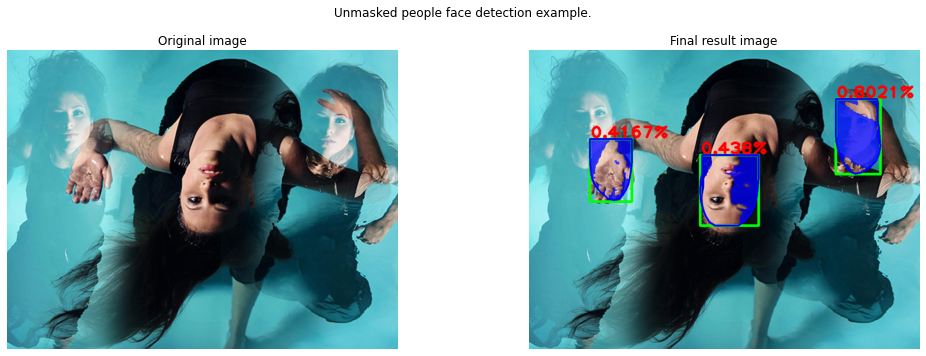

In [33]:
show_images([img1, final_img1],
            ['Original image', 'Final result image'],
            suptitle='Unmasked people face detection example.')

show_images([img2, final_img2],
            ['Original image', 'Final result image'],
            suptitle='Unmasked people face detection example.')

In [34]:
img1 = Image.open('images/masked2.png')
_, _, _, final_img1 = example(img1, highlight_masking=True)

img2 = Image.open('images/masked3.png')
_, _, _, final_img2 = example(img2, highlight_masking=True)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


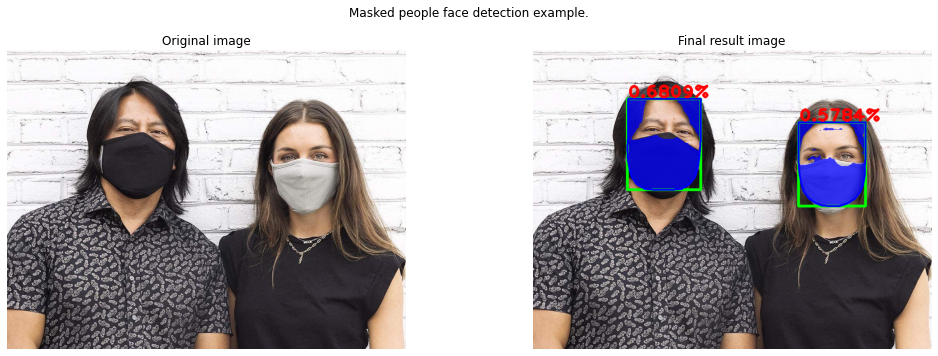

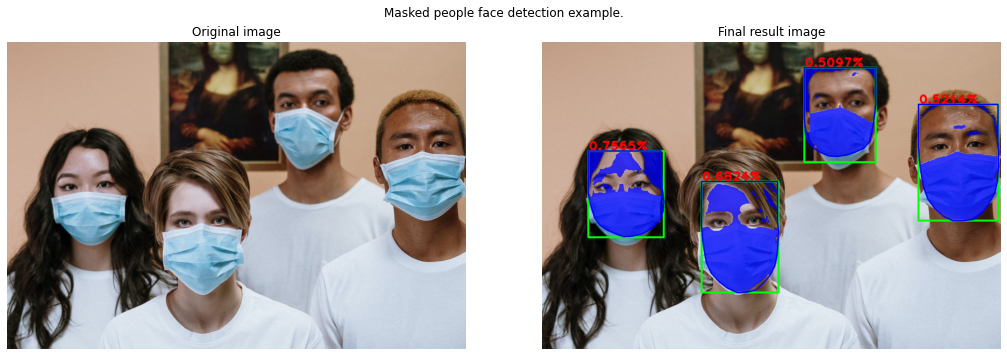

In [35]:
show_images([img1, final_img1],
            ['Original image', 'Final result image'],
            suptitle='Masked people face detection example.')

show_images([img2, final_img2],
            ['Original image', 'Final result image'],
            suptitle='Masked people face detection example.')

In [36]:
img1 = Image.open('images/masked_criminal2.png')
_, _, _, final_img1 = example(img1, highlight_masking=True)

img2 = Image.open('images/masked_criminal3.png')
_, _, _, final_img2 = example(img2, highlight_masking=True)

/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jakub/Dokumenty/venv36/lib/python3.6/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


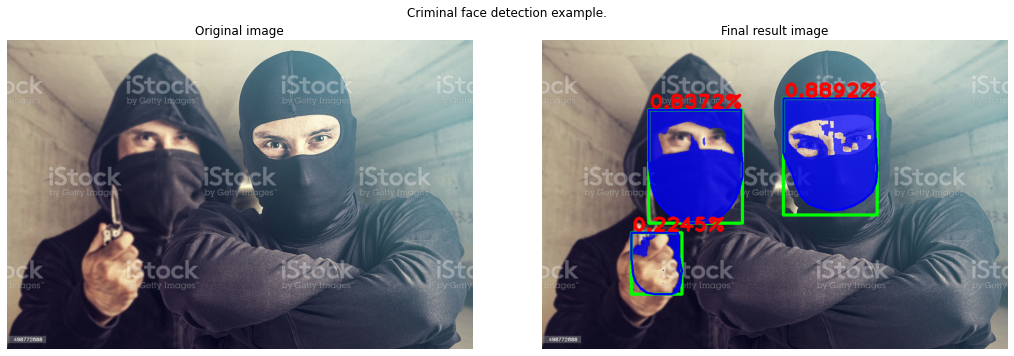

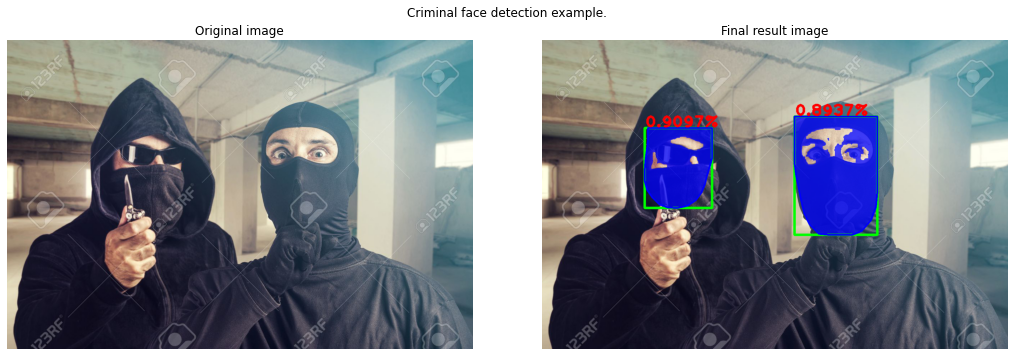

In [37]:
show_images([img1, final_img1],
            ['Original image', 'Final result image'],
            suptitle='Criminal face detection example.')

show_images([img2, final_img2],
            ['Original image', 'Final result image'],
            suptitle='Criminal face detection example.')